<a href="https://colab.research.google.com/github/vathsal14/NOVO-NEUROTECH/blob/main/novonew2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
# Installs the 'requests' library, which is used for making HTTP requests in Python. It simplifies interacting with web services and APIs.
# version: requests-2.32.3
!pip install mne
# Installs the 'mne' library, which is a powerful tool for processing, analyzing, and visualizing EEG, MEG, and other neurophysiological data.
# version: mne-1.9.0
!pip install pyedflib
# Installs the 'pyedflib' library, which allows reading and writing of EDF (European Data Format) and BDF (Biosemi Data Format) files, commonly used in EEG data storage.
# version: pyedflib-0.1.38
!pip install openneuro-py
# Installs the 'openneuro-py' library, a Python client for accessing and downloading datasets from OpenNeuro, a platform for neuroimaging data sharing.
# aiofiles-24.1.0 graphql-core-3.2.5 openneuro-py-2024.2.0 sgqlc-16.4
!pip install PyWavelets
# Installs the 'PyWavelets' library, which provides wavelet transform functions for signal processing, including denoising, feature extraction, and compression.
# version: PyWavelets-1.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.7 MB/s eta 0:00:00


In [ ]:
# Importing the Google Colab drive module
from google.colab import drive
# Mounting Google Drive to the Colab environment
# This allows you to access files stored in your Google Drive directly from the Colab notebook.
# The "/content/drive" is the directory where the Drive will be mounted.
# After mounting, you can interact with your Drive files as if they were local files.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-dotenv
# 'python-dotenv' is a library that allows you to manage environment variables from a `.env` file.
# This is particularly useful for securely storing sensitive information such as API keys, database credentials, etc.
# By using environment variables, you avoid hardcoding sensitive data directly in your code.

In [ ]:
import os  # The 'os' module is used to interact with the operating system, such as reading environment variables.
from dotenv import load_dotenv  # 'load_dotenv' is used to load environment variables from a .env file.
# Specify the path to the .env file
# The .env file stores environment variables like API keys securely.
# In this case, the .env file is located in the user's Google Drive.
env_path = '/content/drive/My Drive/ColabEnvFiles/API_KEY.env'
# Load the environment variables from the specified .env file
load_dotenv(env_path)
# Access the API key using the key name as defined in the .env file
api_key = os.getenv("OPENNEURO_API_KEY")
# Check if the API key was successfully loaded
if api_key:
    print("API Key loaded successfully!")  # Inform the user that the API key was loaded.
else:
    print("Failed to load API Key. Check your .env file and path.")  # Error message if loading fails.

API Key loaded successfully!


In [ ]:
import openneuro
import os

dataset_id = 'ds004584'
target_dir = os.path.join(os.getcwd(), dataset_id)

# Create directory for dataset
def create_directory(dir_path):
    try:
        os.makedirs(dir_path, exist_ok=True)
        print(f"Directory created successfully at: {dir_path}")
    except Exception as e:
        print(f"Error creating directory at {dir_path}: {e}")

create_directory(target_dir)

# Download entire dataset without subject restriction
openneuro.download(dataset=dataset_id, target_dir=target_dir)

Directory created successfully at: /content/ds004584

👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004584 …


📁 Traversing directories for ds004584 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 1049 files (5 concurrent downloads). 
✅ Finished downloading ds004584.
 
🧠 Please enjoy your brains.
 


In [ ]:
import os
import openneuro
import mne
import pandas as pd
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset ID
dataset_id = 'ds004584'
target_dir = os.path.join(os.getcwd(), dataset_id)

# Create target directory if not exists
os.makedirs(target_dir, exist_ok=True)

# Download dataset
print("Downloading dataset...")
openneuro.download(dataset=dataset_id, target_dir=target_dir)

# Process all subjects in the dataset
subject_dirs = [d for d in os.listdir(target_dir) if d.startswith('sub-')]

print(f"Found {len(subject_dirs)} subjects in the dataset.")

features_list = []

for subject in subject_dirs:
    print(f"Processing subject: {subject}")

    raw_fname = os.path.join(target_dir, subject, 'eeg', f'{subject}_task-Rest_eeg.set')
    if not os.path.exists(raw_fname):
        print(f"EEG data file not found for {subject}. Skipping.")
        continue

    try:
        raw = mne.io.read_raw_eeglab(raw_fname, preload=True)

        # Preprocess data
        raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
        montage = mne.channels.make_standard_montage("standard_1020")
        raw_filtered.set_montage(montage, on_missing="ignore")

        # ICA
        ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=800)
        ica.fit(raw_filtered)
        raw_cleaned = ica.apply(raw_filtered)

        # Epoching
        events, event_id = mne.events_from_annotations(raw_cleaned)
        epochs = mne.Epochs(
            raw_cleaned, events, event_id=event_id,
            tmin=0, tmax=3, baseline=(0, 0), detrend=1, preload=True
        )
        epochs.drop_bad()

        # Extract features
        freq_bands = {
            'delta': (1, 4),
            'theta': (4, 8),
            'alpha': (8, 12),
            'beta': (12, 30),
            'gamma': (30, 50)
        }

        def compute_band_power(epoch_data, sfreq, freq_bands):
            power_features = {}
            for band, (low, high) in freq_bands.items():
                f, psd = welch(epoch_data, sfreq, nperseg=1024)
                psd = psd[(f >= low) & (f <= high)]
                power = np.sum(psd)
                power_features[f'{band}_power'] = power
            return power_features

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            band_power = compute_band_power(epoch_data.mean(axis=0), epochs.info['sfreq'], freq_bands)
            band_power['subject'] = subject
            band_power['epoch'] = epoch_idx
            features_list.append(band_power)

    except Exception as e:
        print(f"Error processing subject {subject}: {e}")
        continue

# Save extracted features
features_df = pd.DataFrame(features_list)
features_df.to_csv("eeg_features.csv", index=False)
print("Feature extraction complete. Features saved to 'eeg_features.csv'.")


👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004584 …


📁 Traversing directories for ds004584 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 1049 files (5 concurrent downloads). 
✅ Finished downloading ds004584.
 
🧠 Please enjoy your brains.
 
Found 149 subjects in the dataset.
Processing subject: sub-066
Reading /content/ds004584/sub-066/eeg/sub-066_task-Rest_eeg.fdt
Reading 0 ... 69309  =      0.000 ...   138.618 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-125
EEG data file not found for sub-125. Skipping.
Processing subject: sub-135
EEG data file not found for sub-135. Skipping.
Processing subject: sub-109
EEG data file not found for sub-109. Skipping.
Processing subject: sub-029
Reading /content/ds004584/sub-029/eeg/sub-029_task-Rest_eeg.fdt
Reading 0 ... 101669  =      0.000 ...   203.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 16.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-090
Reading /content/ds004584/sub-090/eeg/sub-090_task-Rest_eeg.fdt
Reading 0 ... 70909  =      0.000 ...   141.818 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-038
Reading /content/ds004584/sub-038/eeg/sub-038_task-Rest_eeg.fdt
Reading 0 ... 68019  =      0.000 ...   136.038 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-149
EEG data file not found for sub-149. Skipping.
Processing subject: sub-082
Reading /content/ds004584/sub-082/eeg/sub-082_task-Rest_eeg.fdt
Reading 0 ... 80309  =      0.000 ...   160.618 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 117.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-144
EEG data file not found for sub-144. Skipping.
Processing subject: sub-037
Reading /content/ds004584/sub-037/eeg/sub-037_task-Rest_eeg.fdt
Reading 0 ... 64879  =      0.000 ...   129.758 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-015
Reading /content/ds004584/sub-015/eeg/sub-015_task-Rest_eeg.fdt
Reading 0 ... 60409  =      0.000 ...   120.818 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-021
Reading /content/ds004584/sub-021/eeg/sub-021_task-Rest_eeg.fdt
Reading 0 ... 79669  =      0.000 ...   159.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 112.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-011
Reading /content/ds004584/sub-011/eeg/sub-011_task-Rest_eeg.fdt
Reading 0 ... 78059  =      0.000 ...   156.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-071
Reading /content/ds004584/sub-071/eeg/sub-071_task-Rest_eeg.fdt
Reading 0 ... 68129  =      0.000 ...   136.258 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-136
EEG data file not found for sub-136. Skipping.
Processing subject: sub-077
Reading /content/ds004584/sub-077/eeg/sub-077_task-Rest_eeg.fdt
Reading 0 ... 81119  =      0.000 ...   162.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-031
Reading /content/ds004584/sub-031/eeg/sub-031_task-Rest_eeg.fdt
Reading 0 ... 90669  =      0.000 ...   181.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-111
EEG data file not found for sub-111. Skipping.
Processing subject: sub-067
Reading /content/ds004584/sub-067/eeg/sub-067_task-Rest_eeg.fdt
Reading 0 ... 64349  =      0.000 ...   128.698 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (f

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-123
EEG data file not found for sub-123. Skipping.
Processing subject: sub-070
Reading /content/ds004584/sub-070/eeg/sub-070_task-Rest_eeg.fdt
Reading 0 ... 60689  =      0.000 ...   121.378 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-131
EEG data file not found for sub-131. Skipping.
Processing subject: sub-065
Reading /content/ds004584/sub-065/eeg/sub-065_task-Rest_eeg.fdt
Reading 0 ... 61929  =      0.000 ...   123.858 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-126
EEG data file not found for sub-126. Skipping.
Processing subject: sub-114
EEG data file not found for sub-114. Skipping.
Processing subject: sub-079
Reading /content/ds004584/sub-079/eeg/sub-079_task-Rest_eeg.fdt
Reading 0 ... 79469  =      0.000 ...   158.938 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-036
Reading /content/ds004584/sub-036/eeg/sub-036_task-Rest_eeg.fdt
Reading 0 ... 60859  =      0.000 ...   121.718 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-121
EEG data file not found for sub-121. Skipping.
Processing subject: sub-074
Reading /content/ds004584/sub-074/eeg/sub-074_task-Rest_eeg.fdt
Reading 0 ... 69949  =      0.000 ...   139.898 secs...
Error processing subject sub-074: Incorrect number of samples (1851270 != 4406850), please report this error to MNE-Python developers
Processing subject: sub-116
EEG data file not found for sub-116. Skipping.
Processing subject:

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-016
Reading /content/ds004584/sub-016/eeg/sub-016_task-Rest_eeg.fdt
Reading 0 ... 60829  =      0.000 ...   121.658 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-132
EEG data file not found for sub-132. Skipping.
Processing subject: sub-063
Reading /content/ds004584/sub-063/eeg/sub-063_task-Rest_eeg.fdt
Reading 0 ... 78169  =      0.000 ...   156.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-139
EEG data file not found for sub-139. Skipping.
Processing subject: sub-050
Reading /content/ds004584/sub-050/eeg/sub-050_task-Rest_eeg.fdt
Reading 0 ... 62219  =      0.000 ...   124.438 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-100
Reading /content/ds004584/sub-100/eeg/sub-100_task-Rest_eeg.fdt
Reading 0 ... 69789  =      0.000 ...   139.578 secs...
Error processing subject sub-100: Incorrect number of samples (3780747 != 4396770), please report this error to MNE-Python developers
Processing subject: sub-010
Reading /content/ds004584/sub-010/eeg/sub-010_task-Rest_eeg.fdt
Reading 0 ... 171349  =      0.000 ...   342.698 secs...
Filtering raw data i

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-048
Reading /content/ds004584/sub-048/eeg/sub-048_task-Rest_eeg.fdt
Reading 0 ... 119009  =      0.000 ...   238.018 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-147
EEG data file not found for sub-147. Skipping.
Processing subject: sub-019
Reading /content/ds004584/sub-019/eeg/sub-019_task-Rest_eeg.fdt
Reading 0 ... 93039  =      0.000 ...   186.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (f

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-093
Reading /content/ds004584/sub-093/eeg/sub-093_task-Rest_eeg.fdt
Reading 0 ... 66119  =      0.000 ...   132.238 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-039
Reading /content/ds004584/sub-039/eeg/sub-039_task-Rest_eeg.fdt
Reading 0 ... 82659  =      0.000 ...   165.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-083
Reading /content/ds004584/sub-083/eeg/sub-083_task-Rest_eeg.fdt
Reading 0 ... 91629  =      0.000 ...   183.258 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-059
Reading /content/ds004584/sub-059/eeg/sub-059_task-Rest_eeg.fdt
Reading 0 ... 67849  =      0.000 ...   135.698 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-004
Reading /content/ds004584/sub-004/eeg/sub-004_task-Rest_eeg.fdt
Reading 0 ... 131979  =      0.000 ...   263.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-096
Reading /content/ds004584/sub-096/eeg/sub-096_task-Rest_eeg.fdt
Reading 0 ... 65259  =      0.000 ...   130.518 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-080
Reading /content/ds004584/sub-080/eeg/sub-080_task-Rest_eeg.fdt
Reading 0 ... 73569  =      0.000 ...   147.138 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-089
Reading /content/ds004584/sub-089/eeg/sub-089_task-Rest_eeg.fdt
Reading 0 ... 78439  =      0.000 ...   156.878 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-112
EEG data file not found for sub-112. Skipping.
Processing subject: sub-053
Reading /content/ds004584/sub-053/eeg/sub-053_task-Rest_eeg.fdt
Reading 0 ... 63219  =      0.000 ...   126.438 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-101
Reading /content/ds004584/sub-101/eeg/sub-101_task-Rest_eeg.fdt
Reading 0 ... 134449  =      0.000 ...   268.898 secs...
Error processing subject sub-101: Incorrect number of samples (3073931 != 8470350), please report this error to MNE-Python developers
Processing subject: sub-148
EEG data file not found for sub-148. Skipping.
Processing subject: sub-110
EEG data file not found for sub-110. Skipping.
Processing subject

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-141
EEG data file not found for sub-141. Skipping.
Processing subject: sub-024
Reading /content/ds004584/sub-024/eeg/sub-024_task-Rest_eeg.fdt
Reading 0 ... 75649  =      0.000 ...   151.298 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-062
Reading /content/ds004584/sub-062/eeg/sub-062_task-Rest_eeg.fdt
Reading 0 ... 62539  =      0.000 ...   125.078 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-045
Reading /content/ds004584/sub-045/eeg/sub-045_task-Rest_eeg.fdt
Reading 0 ... 72669  =      0.000 ...   145.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 101.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-097
Reading /content/ds004584/sub-097/eeg/sub-097_task-Rest_eeg.fdt
Reading 0 ... 79799  =      0.000 ...   159.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-119
EEG data file not found for sub-119. Skipping.
Processing subject: sub-040
Reading /content/ds004584/sub-040/eeg/sub-040_task-Rest_eeg.fdt
Reading 0 ... 68659  =      0.000 ...   137.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found


<ipython-input-12-0bbc66c5da4d>:55: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (63) and smallest (1.3e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 11
  ica.fit(raw_filtered)


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-007
Reading /content/ds004584/sub-007/eeg/sub-007_task-Rest_eeg.fdt
Reading 0 ... 119909  =      0.000 ...   239.818 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-069
Reading /content/ds004584/sub-069/eeg/sub-069_task-Rest_eeg.fdt
Reading 0 ... 63259  =      0.000 ...   126.518 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-003
Reading /content/ds004584/sub-003/eeg/sub-003_task-Rest_eeg.fdt
Reading 0 ... 126179  =      0.000 ...   252.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-138
EEG data file not found for sub-138. Skipping.
Processing subject: sub-104
EEG data file not found for sub-104. Skipping.
Processing subject: sub-086
Reading /content/ds004584/sub-086/eeg/sub-086_task-Rest_eeg.fdt
Reading 0 ... 77579  =      0.000 ...   155.158 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-078
Reading /content/ds004584/sub-078/eeg/sub-078_task-Rest_eeg.fdt
Reading 0 ... 72929  =      0.000 ...   145.858 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-081
Reading /content/ds004584/sub-081/eeg/sub-081_task-Rest_eeg.fdt
Reading 0 ... 65499  =      0.000 ...   130.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 95.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-130
EEG data file not found for sub-130. Skipping.
Processing subject: sub-001
Reading /content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.fdt
Reading 0 ... 140829  =      0.000 ...   281.658 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-140
EEG data file not found for sub-140. Skipping.
Processing subject: sub-035
Reading /content/ds004584/sub-035/eeg/sub-035_task-Rest_eeg.fdt
Reading 0 ... 101219  =      0.000 ...   202.438 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-051
Reading /content/ds004584/sub-051/eeg/sub-051_task-Rest_eeg.fdt
Reading 0 ... 62229  =      0.000 ...   124.458 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.4s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-134
EEG data file not found for sub-134. Skipping.
Processing subject: sub-133
EEG data file not found for sub-133. Skipping.
Processing subject: sub-026
Reading /content/ds004584/sub-026/eeg/sub-026_task-Rest_eeg.fdt
Reading 0 ... 71409  =      0.000 ...   142.818 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-103
Reading /content/ds004584/sub-103/eeg/sub-103_task-Rest_eeg.fdt
Reading 0 ... 118229  =      0.000 ...   236.458 secs...
Error processing subject sub-103: Incorrect number of samples (379275 != 7448490), please report this error to MNE-Python developers
Processing subject: sub-072
Reading /content/ds004584/sub-072/eeg/sub-072_task-Rest_eeg.fdt
Reading 0 ... 75769  =      0.000 ...   151.538 secs...
Error processing subj

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-005
Reading /content/ds004584/sub-005/eeg/sub-005_task-Rest_eeg.fdt
Reading 0 ... 124769  =      0.000 ...   249.538 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 13.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-052
Reading /content/ds004584/sub-052/eeg/sub-052_task-Rest_eeg.fdt
Reading 0 ... 65469  =      0.000 ...   130.938 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-129
EEG data file not found for sub-129. Skipping.
Processing subject: sub-061
Reading /content/ds004584/sub-061/eeg/sub-061_task-Rest_eeg.fdt
Reading 0 ... 62499  =      0.000 ...   124.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-124
EEG data file not found for sub-124. Skipping.
Processing subject: sub-118
EEG data file not found for sub-118. Skipping.
Processing subject: sub-102
Reading /content/ds004584/sub-102/eeg/sub-102_task-Rest_eeg.fdt
Reading 0 ... 105429  =      0.000 ...   210.858 secs...
Error processing subject sub-102: Incorrect number of samples (883851 != 6642090), please report this error to MNE-Python developers
Processing subject:

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-073
Reading /content/ds004584/sub-073/eeg/sub-073_task-Rest_eeg.fdt
Reading 0 ... 66689  =      0.000 ...   133.378 secs...
Error processing subject sub-073: Incorrect number of samples (2415243 != 4201470), please report this error to MNE-Python developers
Processing subject: sub-044
Reading /content/ds004584/sub-044/eeg/sub-044_task-Rest_eeg.fdt
Reading 0 ... 69749  =      0.000 ...   139.498 secs...
Filtering raw data in

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-047
Reading /content/ds004584/sub-047/eeg/sub-047_task-Rest_eeg.fdt
Reading 0 ... 65469  =      0.000 ...   130.938 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-143
EEG data file not found for sub-143. Skipping.
Processing subject: sub-018
Reading /content/ds004584/sub-018/eeg/sub-018_task-Rest_eeg.fdt
Reading 0 ... 75779  =      0.000 ...   151.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-076
Reading /content/ds004584/sub-076/eeg/sub-076_task-Rest_eeg.fdt
Reading 0 ... 66049  =      0.000 ...   132.098 secs...
Error processing subject sub-076: Incorrect number of samples (134531 != 4161150), please report this error to MNE-Python developers
Processing subject: sub-022
Reading /content/ds004584/sub-022/eeg/sub-022_task-Rest_eeg.fdt
Reading 0 ... 76869  =      0.000 ...   153.738 secs...
Filtering raw data in 

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-028
Reading /content/ds004584/sub-028/eeg/sub-028_task-Rest_eeg.fdt
Reading 0 ... 77299  =      0.000 ...   154.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-055
Reading /content/ds004584/sub-055/eeg/sub-055_task-Rest_eeg.fdt
Reading 0 ... 62179  =      0.000 ...   124.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 15.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-127
EEG data file not found for sub-127. Skipping.
Processing subject: sub-008
Reading /content/ds004584/sub-008/eeg/sub-008_task-Rest_eeg.fdt
Reading 0 ... 117239  =      0.000 ...   234.478 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-009
Reading /content/ds004584/sub-009/eeg/sub-009_task-Rest_eeg.fdt
Reading 0 ... 124079  =      0.000 ...   248.158 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 13.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-046
Reading /content/ds004584/sub-046/eeg/sub-046_task-Rest_eeg.fdt
Reading 0 ... 65639  =      0.000 ...   131.278 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-105
EEG data file not found for sub-105. Skipping.
Processing subject: sub-013
Reading /content/ds004584/sub-013/eeg/sub-013_task-Rest_eeg.fdt
Reading 0 ... 61529  =      0.000 ...   123.058 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.1s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-128
EEG data file not found for sub-128. Skipping.
Processing subject: sub-106
EEG data file not found for sub-106. Skipping.
Processing subject: sub-095
Reading /content/ds004584/sub-095/eeg/sub-095_task-Rest_eeg.fdt
Reading 0 ... 61669  =      0.000 ...   123.338 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-087
Reading /content/ds004584/sub-087/eeg/sub-087_task-Rest_eeg.fdt
Reading 0 ... 63359  =      0.000 ...   126.718 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-108
EEG data file not found for sub-108. Skipping.
Processing subject: sub-014
Reading /content/ds004584/sub-014/eeg/sub-014_task-Rest_eeg.fdt
Reading 0 ... 62799  =      0.000 ...   125.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-068
Reading /content/ds004584/sub-068/eeg/sub-068_task-Rest_eeg.fdt
Reading 0 ... 60849  =      0.000 ...   121.698 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 66 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 66 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-043
Reading /content/ds004584/sub-043/eeg/sub-043_task-Rest_eeg.fdt
Reading 0 ... 65629  =      0.000 ...   131.258 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-092
Reading /content/ds004584/sub-092/eeg/sub-092_task-Rest_eeg.fdt
Reading 0 ... 60799  =      0.000 ...   121.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-027
Reading /content/ds004584/sub-027/eeg/sub-027_task-Rest_eeg.fdt
Reading 0 ... 60599  =      0.000 ...   121.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-002
Reading /content/ds004584/sub-002/eeg/sub-002_task-Rest_eeg.fdt
Reading 0 ... 163019  =      0.000 ...   326.038 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopba

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-107
EEG data file not found for sub-107. Skipping.
Processing subject: sub-042
Reading /content/ds004584/sub-042/eeg/sub-042_task-Rest_eeg.fdt
Reading 0 ... 73329  =      0.000 ...   146.658 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (f

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-033
Reading /content/ds004584/sub-033/eeg/sub-033_task-Rest_eeg.fdt
Reading 0 ... 65679  =      0.000 ...   131.358 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-142
EEG data file not found for sub-142. Skipping.
Processing subject: sub-056
Reading /content/ds004584/sub-056/eeg/sub-056_task-Rest_eeg.fdt
Reading 0 ... 69589  =      0.000 ...   139.178 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.2s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-099
Reading /content/ds004584/sub-099/eeg/sub-099_task-Rest_eeg.fdt
Reading 0 ... 61109  =      0.000 ...   122.218 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 88.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0 bad epochs dropped
Processing subject: sub-088
Reading /content/ds004584/sub-088/eeg/sub-088_task-Rest_eeg.fdt
Reading 0 ... 60659  =      0.000 ...   121.318 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-017
Reading /content/ds004584/sub-017/eeg/sub-017_task-Rest_eeg.fdt
Reading 0 ... 92609  =      0.000 ...   185.218 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-146
EEG data file not found for sub-146. Skipping.
Processing subject: sub-058
Reading /content/ds004584/sub-058/eeg/sub-058_task-Rest_eeg.fdt
Reading 0 ... 62559  =      0.000 ...   125.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-020
Reading /content/ds004584/sub-020/eeg/sub-020_task-Rest_eeg.fdt
Reading 0 ... 90589  =      0.000 ...   181.178 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-049
Reading /content/ds004584/sub-049/eeg/sub-049_task-Rest_eeg.fdt
Reading 0 ... 60829  =      0.000 ...   121.658 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-098
Reading /content/ds004584/sub-098/eeg/sub-098_task-Rest_eeg.fdt
Reading 0 ... 61009  =      0.000 ...   122.018 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 7.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-041
Reading /content/ds004584/sub-041/eeg/sub-041_task-Rest_eeg.fdt
Reading 0 ... 75279  =      0.000 ...   150.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 106.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-064
Reading /content/ds004584/sub-064/eeg/sub-064_task-Rest_eeg.fdt
Reading 0 ... 80809  =      0.000 ...   161.618 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.2

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 8.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-094
Reading /content/ds004584/sub-094/eeg/sub-094_task-Rest_eeg.fdt
Reading 0 ... 71559  =      0.000 ...   143.118 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 6.6s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 64 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-145
EEG data file not found for sub-145. Skipping.
Processing subject: sub-023
Reading /content/ds004584/sub-023/eeg/sub-023_task-Rest_eeg.fdt
Reading 0 ... 84549  =      0.000 ...   169.098 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fi

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 121.3s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-084
Reading /content/ds004584/sub-084/eeg/sub-084_task-Rest_eeg.fdt
Reading 0 ... 62729  =      0.000 ...   125.458 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.8s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-034
Reading /content/ds004584/sub-034/eeg/sub-034_task-Rest_eeg.fdt
Reading 0 ... 87449  =      0.000 ...   174.898 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-060
Reading /content/ds004584/sub-060/eeg/sub-060_task-Rest_eeg.fdt
Reading 0 ... 73259  =      0.000 ...   146.518 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.0s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-085
Reading /content/ds004584/sub-085/eeg/sub-085_task-Rest_eeg.fdt
Reading 0 ... 63599  =      0.000 ...   127.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-113
EEG data file not found for sub-113. Skipping.
Processing subject: sub-006
Reading /content/ds004584/sub-006/eeg/sub-006_task-Rest_eeg.fdt
Reading 0 ... 131029  =      0.000 ...   262.058 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (f

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-117
EEG data file not found for sub-117. Skipping.
Processing subject: sub-120
EEG data file not found for sub-120. Skipping.
Processing subject: sub-054
Reading /content/ds004584/sub-054/eeg/sub-054_task-Rest_eeg.fdt
Reading 0 ... 62499  =      0.000 ...   124.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 89.5s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-012
Reading /content/ds004584/sub-012/eeg/sub-012_task-Rest_eeg.fdt
Reading 0 ... 60279  =      0.000 ...   120.558 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)



<ipython-input-12-0bbc66c5da4d>:46: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Processing subject: sub-025
EEG data file not found for sub-025. Skipping.
Feature extraction complete. Features saved to 'eeg_features.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features_df = pd.read_csv("./eeg_features.csv")
print(f"Loaded features: {features_df.shape}")

np.random.seed(42)
labels = np.random.choice([0, 1], size=features_df.shape[0])

# The DataFrame `features_df` does not have a column named "channel".
# Thus, we drop the subject and epoch columns since they are not features for the model.
X = features_df.drop(columns=["subject", "epoch"])
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfe_model = RandomForestClassifier(random_state=42)
rfe_selector = RFECV(estimator=rfe_model, step=1, cv=5, scoring='accuracy')
rfe_selector.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe_selector.support_]
print(f"Selected features ({len(selected_features)}): {selected_features}")

X_train_selected = X_train_scaled[:, rfe_selector.support_]
X_test_selected = X_test_scaled[:, rfe_selector.support_]

final_features_df = features_df[selected_features]
final_features_df.to_csv("selected_eeg_features.csv", index=False)
print("Selected features saved to 'selected_eeg_features.csv'.")

Loaded features: (93, 7)
Selected features (2): Index(['beta_power', 'gamma_power'], dtype='object')
Selected features saved to 'selected_eeg_features.csv'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   delta_power  93 non-null     float64
 1   theta_power  93 non-null     float64
 2   alpha_power  93 non-null     float64
 3   beta_power   93 non-null     float64
 4   gamma_power  93 non-null     float64
 5   subject      0 non-null      float64
 6   epoch        93 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 5.2 KB
None


Loaded features: (93, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   delta_power  93 non-null     float64
 1   theta_power  93 non-null     float64
 2   alpha_power  93 non-null     float64
 3   beta_power   93 non-null     float64
 4   gamma_power  93 non-null     float64
 5   subject      0 non-null      float64
 6   epoch        93 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 5.2 KB
None
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - accuracy: 0.6306 - loss: 6.7069 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 7.1112 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4896 - loss: 6.7712 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4896 - loss: 6.4865 - val_accuracy: 0.5000 - val_loss: 0.7004
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 6.1204 - val_accuracy: 0.5000 - val_loss: 0.7129
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4896 - loss: 5.3970 - val_accuracy: 0.5000 - val_loss: 0.7458
Test Accuracy: 0.5263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9

    accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


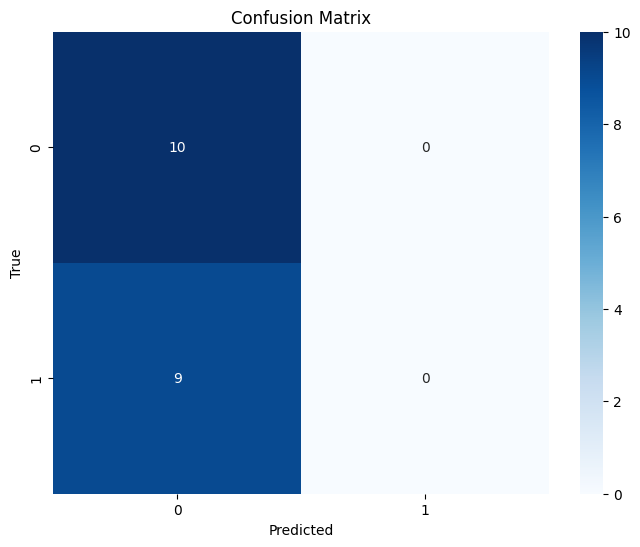

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # For oversampling the minority class

# Load features
features_df = pd.read_csv("eeg_features.csv")  # Use the combined features file
print(f"Loaded features: {features_df.shape}")

# Clean features_df
features_df = features_df.fillna(0)  # Fill missing values with 0
features_df = features_df.apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

# Verify the data
print(features_df.info())

# Prepare data
num_samples = features_df.shape[0]
num_features = features_df.shape[1]
X = features_df.values.reshape(num_samples, num_features, 1)  # Reshape for LSTM
X = tf.cast(X, dtype=tf.float32)  # Ensure TensorFlow float32 type

# Generate random labels for demonstration (replace with actual labels if available)
labels = np.random.choice([0, 1], size=features_df.shape[0])

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(labels)
y_categorical = y_encoded  # Binary labels, not one-hot encoded

X = X.numpy()  # Convert tf.Tensor to a NumPy array

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

# Address class imbalance using SMOTE (oversample minority class)
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy='minority').fit_resample(
    np.nan_to_num(X_train.reshape(X_train.shape[0], -1)),  # Replace NaN with 0
    y_train
)

# Reshape X_train back to its original 3D shape after resampling
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2])

# Define the LSTM model for binary classification (using sigmoid)
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use a single output neuron for binary classification
])

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Class weights to address imbalance
class_weight = {0: 1.0, 1: 20.0}  # Increase the weight for class 1


# Train model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight,  # Use class weights
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels (0 or 1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Loaded features: (93, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   delta_power  93 non-null     float64
 1   theta_power  93 non-null     float64
 2   alpha_power  93 non-null     float64
 3   beta_power   93 non-null     float64
 4   gamma_power  93 non-null     float64
 5   subject      0 non-null      float64
 6   epoch        93 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 5.2 KB
None
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer

2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 512ms/step - accuracy: 0.4674 - loss: 7.3997 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4896 - loss: 6.9867 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5208 - loss: 7.1761 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.5000 - loss: 6.6306 - val_accuracy: 0.5000 - val_loss: 0.6996
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5104 - loss: 6.2897 - val_accuracy: 0.5000 - val_loss: 0.7111
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4688 - loss: 5.2490 - val_accuracy: 0.5000 - val_loss: 0.7416
Test Accuracy: 0.5263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9

    accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


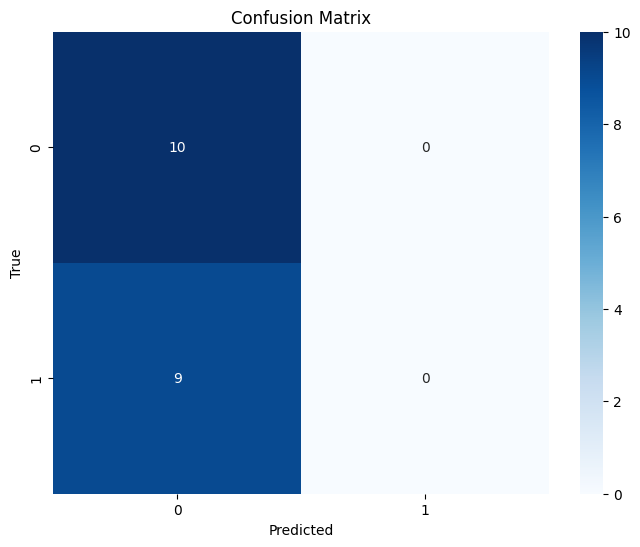

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # For oversampling the minority class

# Load features
features_df = pd.read_csv("eeg_features.csv")  # Use the combined features file
print(f"Loaded features: {features_df.shape}")

# Clean features_df
features_df = features_df.fillna(0)  # Fill missing values with 0
features_df = features_df.apply(pd.to_numeric, errors='coerce')  # Ensure numeric values

# Verify the data
print(features_df.info())

# Prepare data
num_samples = features_df.shape[0]
num_features = features_df.shape[1]
X = features_df.values.reshape(num_samples, num_features, 1)  # Reshape for LSTM
X = tf.cast(X, dtype=tf.float32)  # Ensure TensorFlow float32 type

# Generate random labels for demonstration (replace with actual labels if available)
labels = np.random.choice([0, 1], size=features_df.shape[0])

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(labels)
y_categorical = y_encoded  # Binary labels, not one-hot encoded

X = X.numpy()  # Convert tf.Tensor to a NumPy array

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

# Address class imbalance using SMOTE (oversample minority class)
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy='minority').fit_resample(
    np.nan_to_num(X_train.reshape(X_train.shape[0], -1)),  # Replace NaN with 0
    y_train
)

# Reshape X_train back to its original 3D shape after resampling
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], X_train.shape[1], X_train.shape[2])

# Define the LSTM model for binary classification (using sigmoid)
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use a single output neuron for binary classification
])

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Class weights to address imbalance
class_weight = {0: 1.0, 1: 20.0}  # Increase the weight for class 1


# Train model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight,  # Use class weights
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels (0 or 1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_classes = (y_pred > 0.5).astype("int32")
print(f"Predicted class distribution: {np.unique(y_pred_classes, return_counts=True)}")


Predicted class distribution: (array([0], dtype=int32), array([19]))


In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[10  0]
 [ 9  0]]
